<a href="https://colab.research.google.com/github/Sam-Wadmare/ML-LAB/blob/main/lab/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0


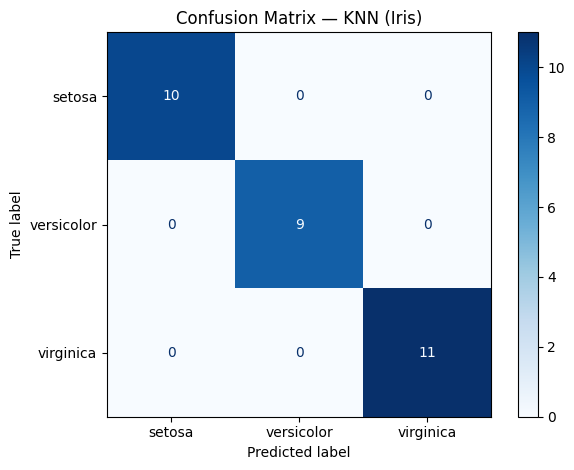

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt

# 1. Load dataset
data = load_iris(as_frame=True)
X = data.data
y = data.target

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # Changed random_state to None
)

# 3. Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# 4. K-Nearest Neighbors
model = KNeighborsClassifier(n_neighbors=5) # Kept n_neighbors at 5
model.fit(X_train, y_train)

# 5. Predictions
y_pred = model.predict(X_test)

# 6. Metrics (multiclass: use macro averaging)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision (macro):", round(precision_score(y_test, y_pred, average='macro'), 4))
print("Recall (macro):", round(recall_score(y_test, y_pred, average='macro'), 4))
print("F1 Score (macro):", round(f1_score(y_test, y_pred, average='macro'), 4))

# 7. Plot — Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=data.target_names, cmap='Blues')
plt.title("Confusion Matrix — KNN (Iris)")
plt.tight_layout()
plt.show()